<a href="https://colab.research.google.com/github/tiagopessoalima/IA/blob/main/Semana_04_(IA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão**

## **Carregamento dos Dados**


### **Baixar e Extrair o Arquivo**


In [1]:
import tarfile
from urllib.request import urlretrieve
from pathlib import Path

URL = "https://raw.githubusercontent.com/tiagopessoalima/TATI/main/datasets/housing_semana_03.tgz"
DIR = Path("datasets/housing")
TGZ = DIR / "housing.tgz"
CSV = DIR / "housing.csv"

def baixar():
    DIR.mkdir(parents=True, exist_ok=True)
    if not TGZ.is_file():
        urlretrieve(URL, TGZ)

def extrair():
    if TGZ.is_file() and not CSV.is_file():
        with tarfile.open(TGZ) as f:
            f.extractall(path=DIR)

baixar()
extrair()

### **Carregamento do CSV**

In [ ]:
import pandas as pd

housing = pd.read_csv(DIR / 'housing_semana_03.csv')

## **5. Treinamento do Modelo**

O treinamento de modelos de aprendizado de máquina é o processo central no qual um algoritmo aprende a partir de dados, ajustando seus parâmetros internos para minimizar o erro em relação a uma tarefa específica. É nessa fase que o modelo adquire a capacidade de generalizar padrões e fazer previsões ou tomar decisões sobre novos dados não vistos durante o treinamento. O treinamento de modelos de aprendizado de máquina apresenta diversos desafios, incluindo:

- **Escolha do Algoritmo:** É importante considerar fatores como a complexidade do modelo, a interpretabilidade dos resultados e a capacidade de lidar com diferentes tipos de dados.

- **Hiperparâmetros:** Cada algoritmo possui hiperparâmetros que controlam seu comportamento e influenciam o aprendizado. A escolha dos valores ideais para esses hiperparâmetros é crucial para otimizar o desempenho do modelo e evitar *overfitting* ou *underfitting*.

- **Qualidade dos Dados:** A qualidade dos dados de treinamento é fundamental para o sucesso do modelo. Dados ruidosos, incompletos ou com vieses podem prejudicar o aprendizado e levar a resultados insatisfatórios.

- **Recursos Computacionais:** O treinamento de modelos complexos, especialmente com grandes volumes de dados, pode exigir recursos computacionais significativos em termos de memória, processamento e tempo.

### **A Separação em Features e Target**

Para iniciar o treinamento de um modelo de aprendizado de máquina supervisionado, é fundamental separar os dados em duas partes:

In [ ]:
X = housing.drop(columns=['valor_mediano_casas']) # São as variáveis independentes ou preditoras que serão usadas para fazer previsões.
y = housing['valor_mediano_casas'] # É a variável dependente ou alvo que queremos prever.

### **Preparando os Dados para o Aprendizado de Máquina**

[Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) são uma ferramenta robusta no contexto de aprendizado de máquina que facilitam a automação e a organização de sequências de etapas de transformação de dados e treinamento de modelos. Eles oferecem uma estrutura eficiente para encadear operações, desde o pré-processamento dos dados até a avaliação do modelo final, garantindo clareza e reprodutibilidade no fluxo de trabalho. Neste projeto, utilizaremos a [árvore de regressão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) como o modelo para a análise dos dados. A implementação seguirá os passos essenciais, incluindo:










#### **1. Criar um pipeline para imputar variáveis numéricas**.








In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline_numerico = Pipeline([
    ('imputacao', SimpleImputer(strategy="median")),  # Imputação de valores ausentes com a mediana
])

#### **2. Criar um pipeline para codificar variáveis categóricas**









In [ ]:
from sklearn.preprocessing import OneHotEncoder

pipeline_categorico = Pipeline(steps=[
    ('codificador', OneHotEncoder())  # Ignorar categorias desconhecidas e gerar uma saída densa
])

#### **3. Criar um pré-processador que aplica diferentes transformações a colunas específicas**

In [ ]:
from sklearn.compose import ColumnTransformer

# Selecionar colunas numéricas e categóricas
colunas_numericas = list(X.select_dtypes(include=['float64', 'int64']).columns)
colunas_categoricas = ['proximidade_ao_oceano']

# Criar um pré-processador que aplica diferentes transformações a colunas específicas
preprocessador = ColumnTransformer([
    ('num', pipeline_numerico, colunas_numericas),  # Aplicar pipeline numérico às colunas numéricas
    ('cat', pipeline_categorico, colunas_categoricas),  # Aplicar pipeline categórico às colunas categóricas
])

### **Treinando e Avaliando no Conjunto de Completo**




Com o *pipeline* devidamente configurado para processar tanto variáveis numéricas quanto categóricas, garantimos que os dados sejam adequadamente pré-processados e preparados para o modelo de maneira eficiente. A abordagem modular e estruturada dos *pipelines* permite a integração de múltiplas etapas de transformação, assegurando que as mesmas operações sejam aplicadas de forma consistente durante as fases de treinamento e validação, minimizando o risco de vazamento de dados e maximizando a robustez do modelo.








In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Criar um pipeline completo que inclui o pré-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

# Treinar o modelo
pipeline.fit(X, y)

# Fazer previsões
y_pred = pipeline.predict(X)

# Avaliar o modelo
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Imprimir os resultados
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 0.0
R²: 1.0


Os resultados obtidos no treinamento e avaliação do modelo, com um erro quadrático médio (RMSE) de 0.0 e um coeficiente de determinação (R²) de 1.0, evidenciam um caso claro de *overfitting*. Esse fenômeno indica que o modelo se ajustou perfeitamente aos dados de treinamento, memorizando-os em vez de extrair e generalizar os padrões subjacentes. O *overfitting* ocorre quando a complexidade do modelo é excessiva em relação à quantidade e variabilidade dos dados disponíveis, resultando em um desempenho excepcional nos dados de treinamento, mas comprometendo a capacidade de generalização para novos dados.



### **Treinamento no Conjunto de Treino e Avaliação no Conjunto de Teste**







Para confirmar o *overfitting*, vamos avaliar o modelo em um conjunto de dados de teste separado, que ele nunca viu antes. Se o desempenho no conjunto de teste for significativamente pior do que no conjunto de treinamento, isso confirmará a presença de *overfitting*. A função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do pacote *sklearn* é usada para dividir um conjunto de dados em dois subconjuntos: treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo no conjunto de treinamento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputacao',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['longitude', 'latitude',
                                                   'idade_média_moradias',
                                                   'total_cômodos',
                                                   'total_quartos', 'população',
                                                   'domicílios',
                                                   'renda_mediana']),
                                                 ('cat',
                                                  Pipeline(steps=[('codificador',
                                                                   OneHotEncoder())]),
                                                  ['proximidade_ao_oceano'])])),
                ('modelo', DecisionTreeRegressor(random_state=42))])

#### **Avaliando os resultados do conjunto de treino**


In [ ]:
# Fazer previsões no conjunto de treino
y_train_pred = pipeline.predict(X_train)

# Avaliar o modelo no conjunto de treino
rmse_train = root_mean_squared_error(y_train, y_train_pred)  # RMSE
r2_train = r2_score(y_train, y_train_pred)  # Coeficiente de determinação

# Imprimir os resultados do conjunto de treino
print("Resultados no Conjunto de Treino:")
print(f'RMSE: {rmse_train:.4f}')
print(f'R²: {r2_train:.4f}')

Resultados no Conjunto de Treino:
RMSE: 0.0000
R²: 1.0000


Os resultados obtidos no conjunto de treinamento continuam indicando um ajuste perfeito do modelo aos dados

#### **Avaliando os resultados do conjunto de teste**

In [ ]:
# Fazer previsões no conjunto de teste
y_test_pred = pipeline.predict(X_test)

# Avaliar o modelo no conjunto de teste
rmse_test = root_mean_squared_error(y_test, y_test_pred)  # RMSE
r2_test = r2_score(y_test, y_test_pred)  # Coeficiente de determinação

# Imprimir os resultados do conjunto de teste
print("Resultados no Conjunto de Teste:")
print(f'RMSE: {rmse_test:.4f}')
print(f'R²: {r2_test:.4f}')

Resultados no Conjunto de Teste:
RMSE: 68734.8847
R²: 0.6395


Os resultados no conjunto de teste mostram um desempenho consideravelmente inferior em relação ao conjunto de treinamento. O RMSE foi de 68734.8847, indicando que o modelo possui uma margem de erro significativa nas previsões. O coeficiente de determinação (R²) de 0,6395 sugere que o modelo explica apenas 63,95% da variação dos dados de teste, confirmando a hipótese de *overfitting*.

### ***Overfitting* em Árvores**

Em uma árvore de regressão, o *overfitting* ocorre com frequência quando a profundidade da árvore aumenta excessivamente, resultando em uma modelagem detalhada dos ruídos e particularidades do conjunto de treinamento. Isso compromete sua capacidade de generalização, reduzindo o desempenho preditivo em dados não observados.









In [ ]:
# Extraia o modelo treinado do pipeline
modelo_treinado = pipeline.named_steps['modelo']

# Acesse e imprima a profundidade da árvore
profundidade = modelo_treinado.get_depth()
print(f"A profundidade da árvore é: {profundidade}")

A profundidade da árvore é: 37


Para avaliar o impacto da profundidade de uma árvore de regressão, é essencial quantificar os erros em ambos os conjuntos, de treino e teste, em diversos valores de profundidade máxima. Essa metodologia permite uma análise detalhada do comportamento do modelo em relação ao ajuste aos dados, facilitando a detecção de sinais de *underfitting* e *overfitting*. O parâmetro `max_depth` estabelece um limite para a profundidade da árvore, restringindo o número de níveis que ela pode alcançar. Essa limitação previne a complexidade excessiva da árvore, reduzindo o risco de ajuste excessivo aos dados de treinamento e promovendo uma melhor generalização em conjuntos de dados não vistos.








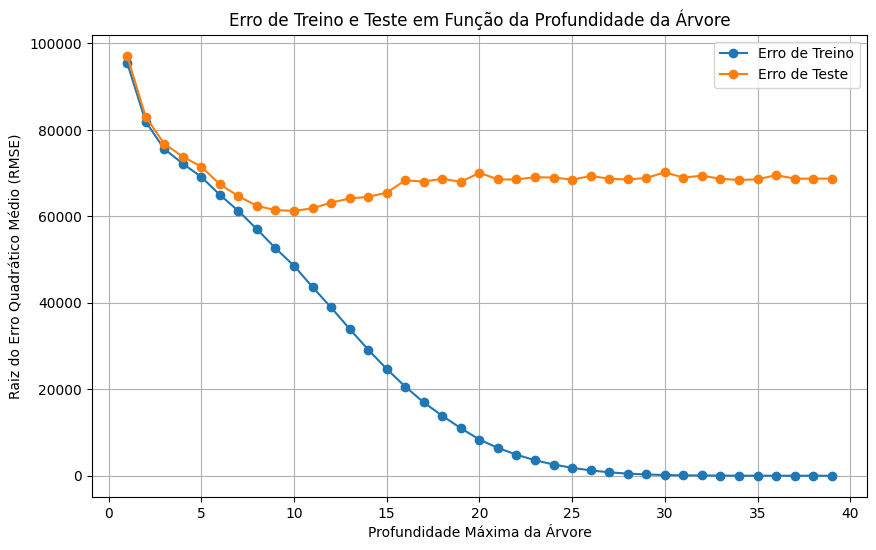

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir intervalos de profundidade para testar
max_depths = np.arange(1, 40)

# Listas para armazenar erros de treino e teste
train_errors = []
test_errors = []

# Loop para testar diferentes profundidades
for depth in max_depths:
    # Criar o pipeline com a profundidade atual
    pipeline = Pipeline([
        ('preprocessador', preprocessador),
        ('modelo', DecisionTreeRegressor(max_depth=depth, random_state=42))
    ])

    # Treinar o modelo
    pipeline.fit(X_train, y_train)

    # Fazer previsões nos conjuntos de treino e teste
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calcular o erro quadrático médio (MSE) para treino e teste
    train_mse = root_mean_squared_error(y_train, y_train_pred)
    test_mse = root_mean_squared_error(y_test, y_test_pred)

    # Armazenar os erros
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Erro de Treino', marker='o')
plt.plot(max_depths, test_errors, label='Erro de Teste', marker='o')
plt.xlabel('Profundidade Máxima da Árvore')
plt.ylabel('Raiz do Erro Quadrático Médio (RMSE)')
plt.title('Erro de Treino e Teste em Função da Profundidade da Árvore')
plt.legend()
plt.grid(True)
plt.show()

### **Estratégias para Combater o *Overfitting***

Apresenta-se um fluxograma típico do fluxo de trabalho de [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html), uma metodologia essencial para a avaliação e otimização do desempenho de modelos de aprendizado de máquina durante o processo de treinamento. Essa abordagem permite uma análise sistemática da eficácia dos modelos, promovendo uma estimativa mais precisa da capacidade de generalização em dados não vistos.








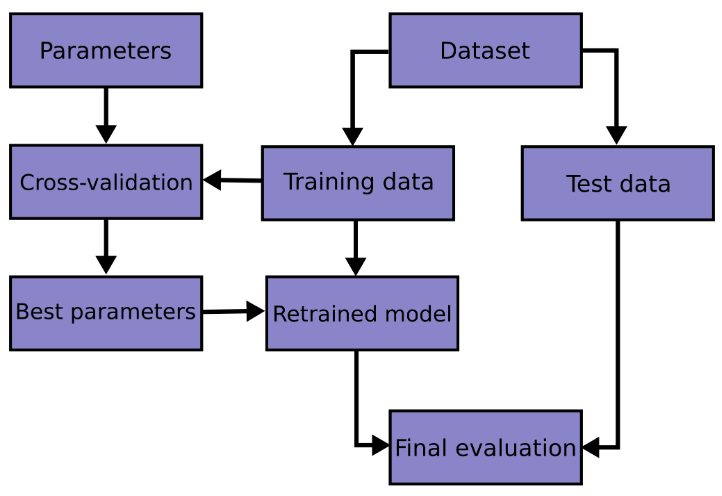

A validação cruzada é uma técnica que envolve a divisão do conjunto de dados em múltiplos subconjuntos, chamados de folds. Nesse processo, o modelo é treinado em um subconjunto específico dos dados e, em seguida, testado em outro subconjunto, garantindo uma avaliação de desempenho mais robusta. Essa abordagem minimiza o viés associado à superexposição aos dados de treinamento, proporcionando uma estimativa mais precisa da capacidade de generalização do modelo em dados não vistos.















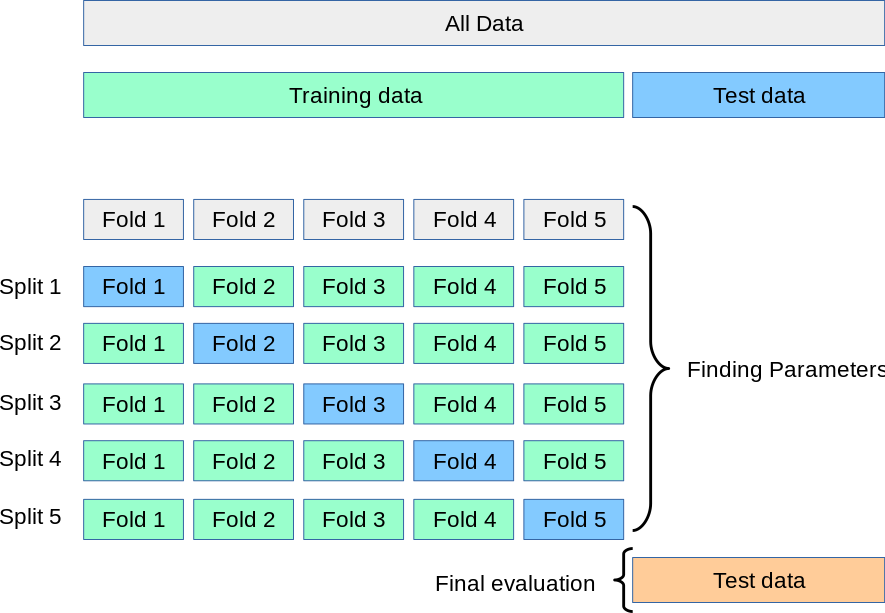

A seguir, apresenta-se uma implementação prática da validação cruzada utilizando a técnica K-Fold.

In [ ]:
from sklearn.model_selection import KFold

# Definir o número de folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Criar um pipeline completo que inclui o pré-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(max_depth=10, random_state=42))
])

# Listas para armazenar os resultados de RMSE e R²
rmse_scores = []
r2_scores = []

# Loop para realizar a validação cruzada
for train_index, test_index in kf.split(X_train):
    # Usar iloc para indexar corretamente os DataFrames
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]

    # Treinar o modelo
    pipeline.fit(X_fold_train, y_fold_train)

    # Fazer previsões
    y_pred = pipeline.predict(X_fold_val)

    # Avaliar o modelo
    rmse = root_mean_squared_error(y_fold_val, y_pred)
    r2 = r2_score(y_fold_val, y_pred)

    # Armazenar os resultados
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calcular médias e desvios padrão
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Imprimir os resultados
print(f'Média RMSE: {mean_rmse:.3f} ± {std_rmse:.3f}')
print(f'Média R²: {mean_r2:.3f} ± {std_r2:.3f}')


Média RMSE: 62561.838 ± 1472.591
Média R²: 0.707 ± 0.008


O ajuste de hiperparâmetros é o processo de otimização dos parâmetros que não são aprendidos diretamente pelo modelo durante o treinamento, mas que afetam seu desempenho, como a profundidade máxima em árvores. Uma estratégia comum para ajustar hiperparâmetros é a busca em grade ou [Grid Search](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html), onde um espaço de hiperparâmetros é definido e o modelo é avaliado para cada combinação de parâmetros usando validação cruzada.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Criar um pipeline completo que inclui o pré-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

# Definir a grade de parâmetros para otimização
param_grid = {
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='r2', n_jobs=-1)

# Treinar o modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Extrair os melhores parâmetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Avaliar o desempenho do modelo otimizado
y_pred = best_model.predict(X_test)

# Calcular RMSE e R²
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir os melhores parâmetros e os resultados de desempenho
print(f'Melhores parâmetros: {best_params}')
print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

Melhores parâmetros: {'modelo__max_depth': 10, 'modelo__min_samples_leaf': 4, 'modelo__min_samples_split': 10}
RMSE: 60102.769
R²: 0.724


## **6. Avaliação dos Resultados**


Os melhores parâmetros encontrados pelo GridSearchCV são:

- `max_depth`: 10
- `min_samples_leaf`: 4
- `min_samples_split`: 10

Isso significa que, dentre as combinações testadas, uma árvore de decisão com profundidade máxima de 10, mínimo de 4 amostras por folha e mínimo de 10 amostras para dividir um nó interno resultou no melhor desempenho de acordo com a métrica de avaliação utilizada (R²).

### **Root Mean Squared Error (RMSE)**

É uma métrica que quantifica o desvio médio das previsões de um modelo em relação aos valores reais. O cálculo é feito da seguinte forma:

- **Cálculo dos erros (resíduos)**: Para cada observação $i$ no conjunto de teste, o erro (ou resíduo) é definido como:
  - $e_i=y_{pred_i}-y_{test_i}$.
    - $y_{pred_i}$ é o valor previso pelo modelo para a observação $i$.
    - $y_{test_i}$ é o valor real (observado) para a observação $i$.

- **Média dos erros quadráticos (MSE)**: A média dos erros quadráticos é calculada sobre todas as $n$ observações no conjunto de teste:

  - $MSE=\frac{1}{n}\sum_{i=1}^n e_i^2$

- **Raiz quadrada da média (RMSE)**: O RMSE é a raiz quadrada do MSE:
  -  $RMSE = \sqrt{MSE}$

A função `calcular_rmse` implementa o cálculo do Root Mean Squared Error (RMSE)



In [ ]:
def calcular_rmse(y_test, y_pred):
    """
    Calcula o RMSE (Root Mean Squared Error) entre os valores reais (y_test) e os valores previstos (y_pred).

    Args:
        y_test: Array NumPy com os valores reais.
        y_pred: Array NumPy com os valores previstos.

    Returns:
        O valor do RMSE.
    """

    # Calcular os erros (resíduos)
    erros = y_pred - y_test

    # Calcular a média dos erros quadráticos (MSE)
    mse = np.mean(np.square(erros))

    # Calcular a raiz quadrada da média (RMSE)
    rmse = np.sqrt(mse)

    return rmse

Exemplo de uso

In [ ]:
rmse = calcular_rmse(y_test, y_pred)
print(f'O RMSE do modelo é: {rmse:.2f}')

O RMSE do modelo é: 60102.77


O RMSE reflete o desvio padrão dos resíduos, oferecendo uma medida da dispersão das previsões em relação aos valores observados, mantendo a mesma unidade de medida da variável alvo. No contexto deste problema, o RMSE indica que o erro médio das previsões do modelo é de aproximadamente 60.102,77 dólares, caracterizando a magnitude média das discrepâncias entre as previsões e os valores reais. Isso implica que, em média, o modelo está subestimando ou superestimando os valores reais em torno dessa ordem de grandeza.








### **Coeficiente de Determinação (R²)**

É uma métrica que complementa o RMSE, quantificando a proporção da variabilidade da variável dependente que é explicada pelo modelo em relação à variabilidade total. Ele varia entre 0 e 1, onde 1 indica que o modelo explica 100% da variação dos dados, e 0 significa que o modelo não explica nada além da média dos valores observados. Enquanto o RMSE expressa o erro médio das previsões na mesma unidade da variável alvo, o R² avalia o quão bem o modelo captura a variação nos dados. O cálculo é realizado da seguinte forma:

- **Cálculo da soma total dos quadrados (SST)**: Primeiro, calcula-se a variabilidade total dos dados em relação à média dos valores reais. Para cada observação $i$, o desvio em relação à média $\bar{y}_{test}$ é elevado ao quadrado:
  - $SST = \sum_{i=1}^n (y_{test_i} - \bar{y}_{test})^2$

- **Cálculo da soma dos resíduos ao quadrado (SSR)**: Em seguida, calcula-se a soma dos quadrados dos resíduos, ou seja, a diferença entre as previsões do modelo e os valores reais:
  - $SSR = \sum_{i=1}^n (y_{test_i} - y_{pred_i})^2$

- **Cálculo do R²**: O R² é dado pela fração da variabilidade total explicada pelo modelo, que pode ser expressa como:
 - $R²=1-\frac{SSR}{SST}$

A função `calcular_r2` implementa o cálculo do Coeficiente de Determinação (R²)

In [ ]:
def calcular_r2(y_test, y_pred):
  """
  Calcula o coeficiente de determinação R² entre os valores reais (y_test) e os valores previstos (y_pred).

  Args:
      y_test: Array NumPy com os valores reais.
      y_pred: Array NumPy com os valores previstos.

  Returns:
      O valor do R².
  """

  # Calcular a média dos valores reais
  media_y_test = np.mean(y_test)

  # Calcular a Soma dos Quadrados Total (SST)
  sst = np.sum(np.square(y_test - media_y_test))

  # Calcular a Soma dos Quadrados dos Resíduos (SSR)
  ssr = np.sum(np.square(y_test - y_pred))

  # Calcular o R²
  r2 = 1 - (ssr / sst)

  return r2

Exemplo de uso

In [ ]:
r2 = calcular_r2(y_test, y_pred)
print(f'R²: {r2:.3f}')

R²: 0.724


O R² de 0.724 indica que aproximadamente 72.4% da variância nos preços dos imóveis (ou qualquer que seja a sua variável alvo) é explicada pelo seu modelo. Embora seja um resultado satisfatório, denota que ainda existe uma parcela considerável da variabilidade que não é capturada pelo modelo, abrindo espaço para aprimoramentos através de técnicas como otimização de hiperparâmetros, seleção de features, engenharia de features ou exploração de modelos mais complexos.

## **7. Exercício**

**Objetivo**:

Propor melhorias que possam aumentar a acurácia e a capacidade explicativa do modelo.

**Sugestões:**

- **Engenharia de Features:** Crie novas features que possam capturar informações relevantes não presentes nas features originais.
- **Novos Modelos:** Explore o uso de algoritmos [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) ou [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).
- **Random Search:** Utilize a técnica de [Random Search](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) para otimizar os hiperparâmetros dos modelos.

**Desafio Adicional:**

- Utilize técnicas de visualização para entender melhor o impacto das novas features e a performance dos modelos.
- Documente suas análises e resultados para facilitar a interpretação e a comunicação das suas descobertas.

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV

def engenharia_de_features(X):
  X["cômodos_por_casa"] = X["total_cômodos"] / X["domicílios"]
  X['razao_quartos'] = X["total_quartos"] / X["total_cômodos"]
  X['geolocalizacao'] = X['latitude'] / X['longitude']
  return X

### Decision Tree

In [ ]:
# Pipeline com engenharia de features e DecisionTreeRegressor
pipeline_dt = Pipeline([
    ('engenharia_de_features', FunctionTransformer(engenharia_de_features)),  # Aplicação da engenharia de features
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', DecisionTreeRegressor(random_state=42))  # Modelo Decision Tree
])

# Definição do grid de hiperparâmetros para Decision Tree
param_grid_dt = {
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# RandomizedSearch para otimização de hiperparâmetros
random_search_dt = RandomizedSearchCV(
    estimator=pipeline_dt,
    param_distributions=param_grid_dt,
    n_iter=40,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# Treinamento do modelo com os melhores hiperparâmetros
random_search_dt.fit(X_train, y_train)

# Melhor modelo encontrado
best_dt_model = random_search_dt.best_estimator_

# Previsões e métricas de avaliação
y_pred_dt = best_dt_model.predict(X_test)
rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Exibição dos resultados
print(f'Decision Tree - RMSE: {rmse_dt:.3f}, R²: {r2_dt:.3f}')

# Melhores hiperparâmetros encontrados
best_params_dt = random_search_dt.best_params_
print(f'Melhores hiperparâmetros: {best_params_dt}')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 36 is smaller than n_iter=40. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Decision Tree - RMSE: 60102.769, R²: 0.724
Melhores hiperparâmetros: {'modelo__min_samples_split': 10, 'modelo__min_samples_leaf': 4, 'modelo__max_depth': 10}


### Random Forest

In [ ]:
# Pipeline sem engenharia de features
pipeline_rf_no_feat = Pipeline([
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', RandomForestRegressor(random_state=42))  # Modelo Random Forest
])

# Pipeline com engenharia de features
pipeline_rf_with_feat = Pipeline([
    ('engenharia_de_features', FunctionTransformer(engenharia_de_features)),  # Aplicação da engenharia de features
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', RandomForestRegressor(random_state=42))  # Modelo Random Forest
])

# Definição do grid de hiperparâmetros
param_grid_rf = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# RandomizedSearch para otimização de hiperparâmetros - sem engenharia de features
random_search_rf_no_feat = RandomizedSearchCV(
    estimator=pipeline_rf_no_feat,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# RandomizedSearch para otimização de hiperparâmetros - com engenharia de features
random_search_rf_with_feat = RandomizedSearchCV(
    estimator=pipeline_rf_with_feat,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# Treinamento dos modelos com e sem engenharia de features
random_search_rf_no_feat.fit(X_train, y_train)
random_search_rf_with_feat.fit(X_train, y_train)

# Melhores modelos encontrados
best_rf_model_no_feat = random_search_rf_no_feat.best_estimator_
best_rf_model_with_feat = random_search_rf_with_feat.best_estimator_

# Previsões e métricas de avaliação - sem engenharia de features
y_pred_rf_no_feat = best_rf_model_no_feat.predict(X_test)
rmse_rf_no_feat = root_mean_squared_error(y_test, y_pred_rf_no_feat)
r2_rf_no_feat = r2_score(y_test, y_pred_rf_no_feat)

# Previsões e métricas de avaliação - com engenharia de features
y_pred_rf_with_feat = best_rf_model_with_feat.predict(X_test)
rmse_rf_with_feat = root_mean_squared_error(y_test, y_pred_rf_with_feat)
r2_rf_with_feat = r2_score(y_test, y_pred_rf_with_feat)

# Exibição dos resultados
print(f'Random Forest sem engenharia de features - RMSE: {rmse_rf_no_feat:.3f}, R²: {r2_rf_no_feat:.3f}')
print(f'Random Forest com engenharia de features - RMSE: {rmse_rf_with_feat:.3f}, R²: {r2_rf_with_feat:.3f}')

# Melhores hiperparâmetros encontrados
best_params_rf_no_feat = random_search_rf_no_feat.best_params_
best_params_rf_with_feat = random_search_rf_with_feat.best_params_
print(f'Melhores hiperparâmetros (sem features): {best_params_rf_no_feat}')
print(f'Melhores hiperparâmetros (com features): {best_params_rf_with_feat}')

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline com engenharia de features e RandomForestRegressor
pipeline_rf_no_feat = Pipeline([
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', RandomForestRegressor(random_state=42))  # Modelo Random Forest
])

# Definição do grid de hiperparâmetros
param_grid_rf = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# RandomizedSearch para otimização de hiperparâmetros
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf_no_feat,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# Treinamento do modelo com os melhores hiperparâmetros
random_search_rf.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf_model = random_search_rf.best_estimator_

# Previsões e métricas de avaliação
y_pred_rf = best_rf_model.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Exibição dos resultados
print(f'Random Forest - RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}')

# Melhores hiperparâmetros encontrados
best_params_rf = random_search_rf.best_params_
print(f'Melhores hiperparâmetros: {best_params_rf}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline com engenharia de features e RandomForestRegressor
pipeline_rf = Pipeline([
    ('engenharia_de_features', FunctionTransformer(engenharia_de_features)),  # Aplicação da engenharia de features
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', RandomForestRegressor(random_state=42))  # Modelo Random Forest
])

# Definição do grid de hiperparâmetros
param_grid_rf = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# RandomizedSearch para otimização de hiperparâmetros
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# Treinamento do modelo com os melhores hiperparâmetros
random_search_rf.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf_model = random_search_rf.best_estimator_

# Previsões e métricas de avaliação
y_pred_rf = best_rf_model.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Exibição dos resultados
print(f'Random Forest - RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}')

# Melhores hiperparâmetros encontrados
best_params_rf = random_search_rf.best_params_
print(f'Melhores hiperparâmetros: {best_params_rf}')

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline com engenharia de features e GradientBoostingRegressor
pipeline_gb = Pipeline([
    ('engenharia_de_features', FunctionTransformer(engenharia_de_features)),  # Aplicação da engenharia de features
    ('preprocessador', preprocessador),  # Preprocessamento de dados
    ('modelo', GradientBoostingRegressor(random_state=42))  # Modelo Gradient Boosting
])

# Definição do grid de hiperparâmetros
param_grid_gb = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__learning_rate': [0.01, 0.1, 0.05],  # Taxa de aprendizado
    'modelo__max_depth': [3, 5, 10],  # Profundidade máxima da árvore
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__subsample': [0.8, 1.0]  # Fração de amostras usadas para treinamento de cada árvore
}

# RandomizedSearch para otimização de hiperparâmetros
random_search_gb = RandomizedSearchCV(
    estimator=pipeline_gb,
    param_distributions=param_grid_gb,
    n_iter=10,
    cv=kf,  # Validação cruzada
    random_state=42,
    n_jobs=-1  # Paralelização
)

# Treinamento do modelo com os melhores hiperparâmetros
random_search_gb.fit(X_train, y_train)

# Melhor modelo encontrado
best_gb_model = random_search_gb.best_estimator_

# Previsões e métricas de avaliação
y_pred_gb = best_gb_model.predict(X_test)
rmse_gb = root_mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Exibição dos resultados
print(f'Gradient Boosting - RMSE: {rmse_gb:.3f}, R²: {r2_gb:.3f}')

# Melhores hiperparâmetros encontrados
best_params_gb = random_search_gb.best_params_
print(f'Melhores hiperparâmetros: {best_params_gb}')

https://www.kaggle.com/code/camnugent/geospatial-feature-engineering-and-visualization

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Função para treinar e avaliar o modelo
def treinar_e_avaliar(pipeline, X_train, y_train, X_test, y_test, param_grid, kf):
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid,
        n_iter=10,
        cv=kf,
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return best_model, rmse, r2, random_search.best_params_

# Definição do grid de hiperparâmetros para Gradient Boosting
param_grid_gb = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__learning_rate': [0.01, 0.1, 0.05],
    'modelo__max_depth': [3, 5, 10],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__subsample': [0.8, 1.0]
}

# Pipeline sem engenharia de features
pipeline_gb_no_feat = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', GradientBoostingRegressor(random_state=42))
])

# Pipeline com engenharia de features
pipeline_gb_with_feat = Pipeline([
    ('engenharia_de_features', FunctionTransformer(engenharia_de_features)),
    ('preprocessador', preprocessador),
    ('modelo', GradientBoostingRegressor(random_state=42))
])

# Treinamento e avaliação - sem engenharia de features
best_gb_model_no_feat, rmse_gb_no_feat, r2_gb_no_feat, best_params_gb_no_feat = treinar_e_avaliar(
    pipeline_gb_no_feat, X_train, y_train, X_test, y_test, param_grid_gb, kf
)

# Treinamento e avaliação - com engenharia de features
best_gb_model_with_feat, rmse_gb_with_feat, r2_gb_with_feat, best_params_gb_with_feat = treinar_e_avaliar(
    pipeline_gb_with_feat, X_train, y_train, X_test, y_test, param_grid_gb, kf
)

# Exibição dos resultados
print(f'Gradient Boosting sem engenharia de features - RMSE: {rmse_gb_no_feat:.3f}, R²: {r2_gb_no_feat:.3f}')
print(f'Gradient Boosting com engenharia de features - RMSE: {rmse_gb_with_feat:.3f}, R²: {r2_gb_with_feat:.3f}')

# Melhores hiperparâmetros encontrados
print(f'Melhores hiperparâmetros (sem features): {best_params_gb_no_feat}')
print(f'Melhores hiperparâmetros (com features): {best_params_gb_with_feat}')
